# DSCI552 HW1
  
by Kartik Balodi  
Github Username: kartikbalodi  
USC ID: 5317465471  

**1. Vertebral Column Data Set**  
  
This Biomedical data set was built by Dr. Henrique da Mota during a medical residence
period in Lyon, France. Each patient in the data set is represented in the data set
by six biomechanical attributes derived from the shape and orientation of the pelvis
and lumbar spine (in this order): **pelvic incidence, pelvic tilt, lumbar lordosis angle,
sacral slope, pelvic radius and grade of spondylolisthesis**. The following convention is
used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and
Abnormal (AB). In this exercise, **we only focus on a binary classification task NO=0
and AB=1.1**  

__(a) Download the Vertebral Column Data Set from: https://archive.ics.uci.
edu/ml/datasets/Vertebral+Column.__

This has been provided in the form of .dat and .arff files, the files include: 

- column_2C.dat
- column_2C_weka.arff
- column_3C.dat
- column_3C_weka.arff

Because we stick to binary classification task, I need to only look at the consider the first two data files, of which I decided to work with column_2C.dat, because it contains the data in a form very similar to csv, making it very familiar to parse.

In [1]:
import pandas as pd
import numpy as np

In [2]:
col_names = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 
                'grade of spondylolisthesis','classes']

df = pd.read_csv('../data/vertebral_column_data/column_2C.dat', sep=' ', names=col_names)

# label class normal NO=0, and abnormal AB=1
df.loc[df['classes'] == 'AB', 'classes'] = 1
df.loc[df['classes'] == 'NO', 'classes'] = 0

# re-casting the 1 and 0 labels as int instead of string objects
df["classes"] = df["classes"].astype(str).astype(int)
display(df)

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,classes
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


In [3]:
# doing these additional commands to get a feel for the data and outliers
df.dtypes

pelvic incidence              float64
pelvic tilt                   float64
lumbar lordosis angle         float64
sacral slope                  float64
pelvic radius                 float64
grade of spondylolisthesis    float64
classes                         int32
dtype: object

In [4]:
# checking for null values
df.isnull().sum()

pelvic incidence              0
pelvic tilt                   0
lumbar lordosis angle         0
sacral slope                  0
pelvic radius                 0
grade of spondylolisthesis    0
classes                       0
dtype: int64

In [5]:
# another check, out of curiosity for the data, since I saw some big outliers later on in the boxplot
df.max(axis=0)

pelvic incidence              129.83
pelvic tilt                    49.43
lumbar lordosis angle         125.74
sacral slope                  121.43
pelvic radius                 163.07
grade of spondylolisthesis    418.54
classes                         1.00
dtype: float64

**(b) Pre-Processing and Exploratory data analysis:  
i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.**


In [6]:
# imports used for plotting/display
import matplotlib.pyplot as plt
import seaborn as sns

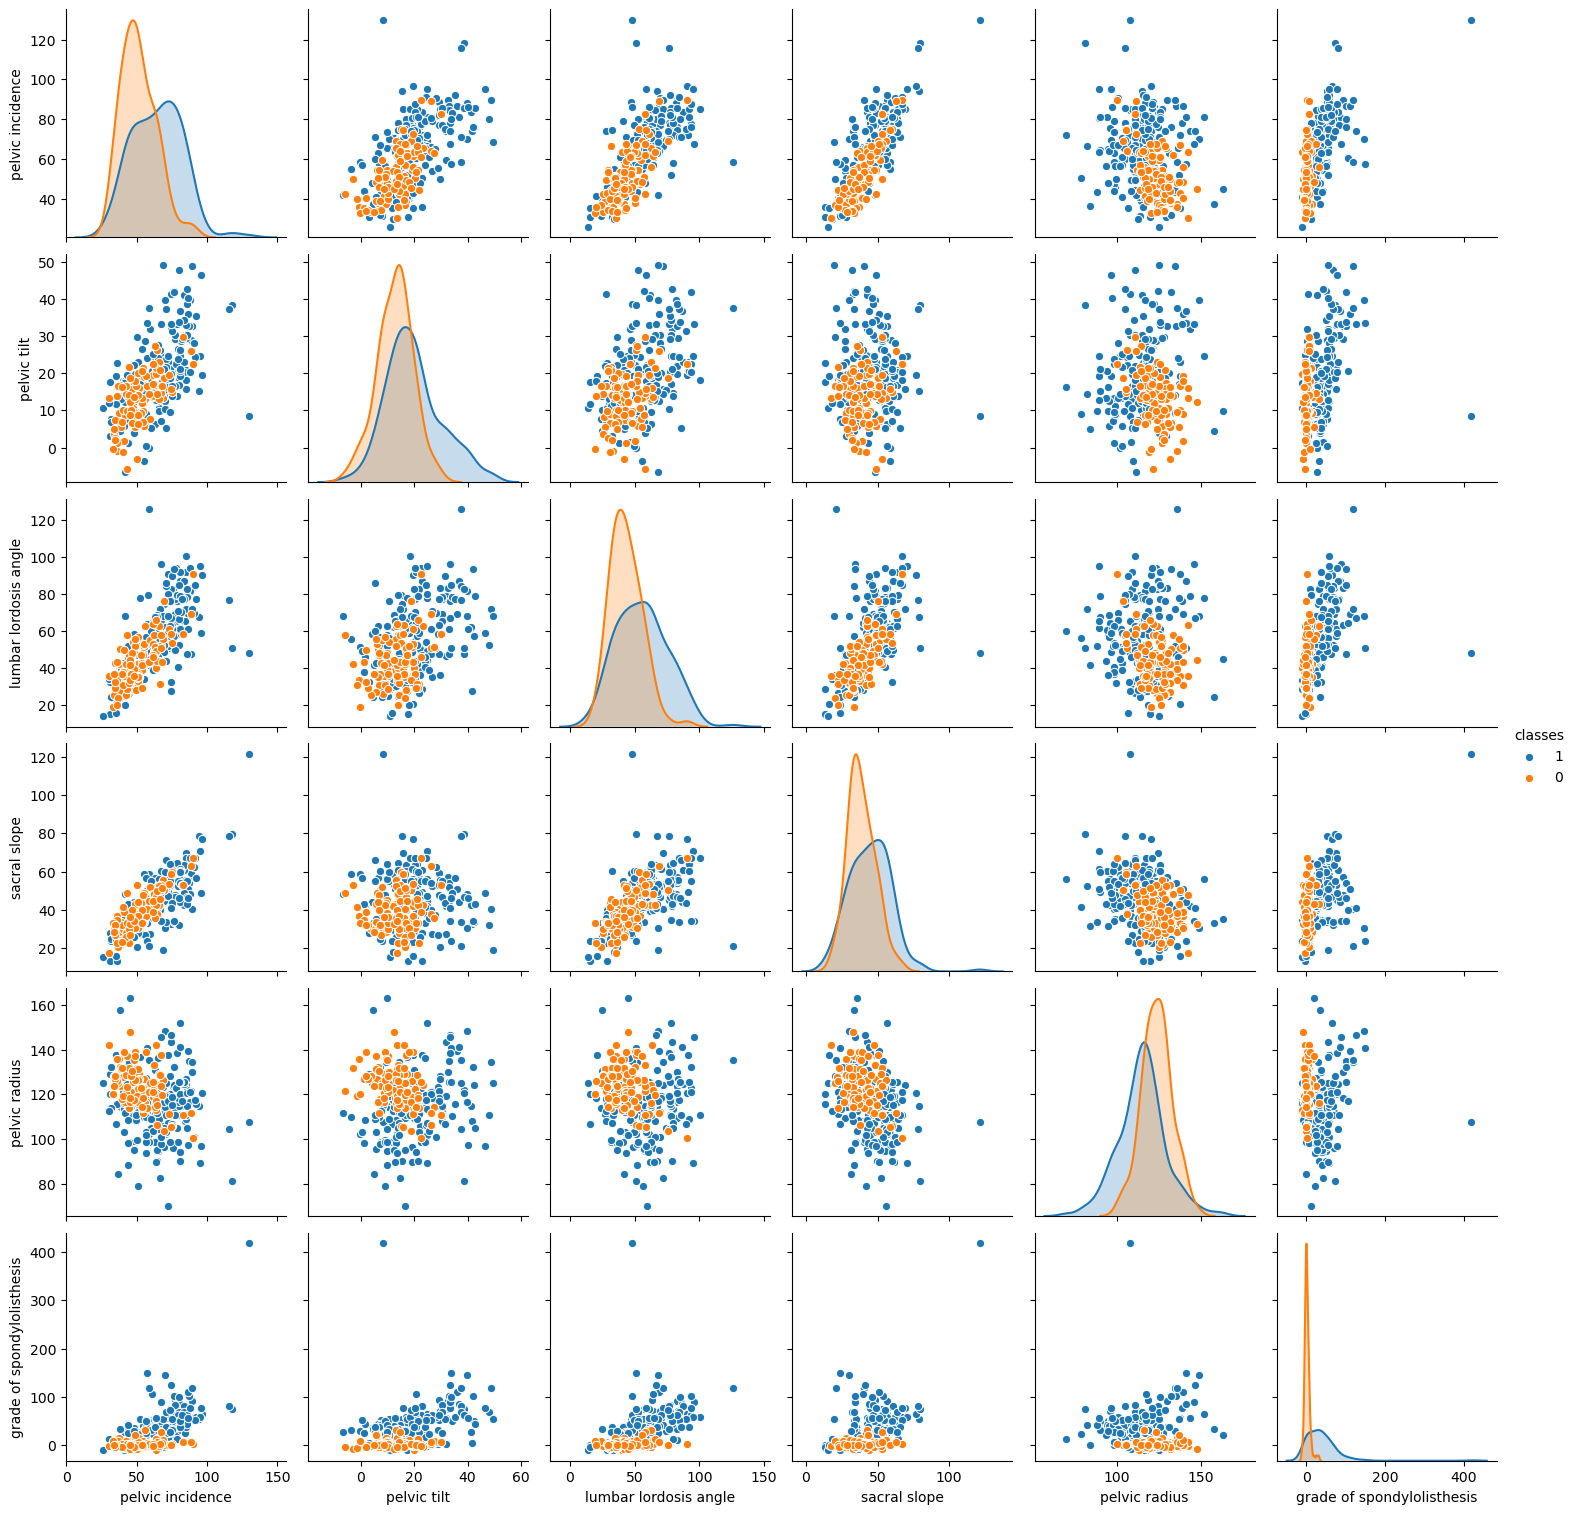

In [7]:
# note here I switched the hue_order, because the blue tends to be hard to notice when class 0 is blue and class 1 is orange
sns.pairplot(df, kind='scatter',hue='classes',hue_order=[1,0])
plt.show()

**ii. Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1 (see ISLR p. 129).**

resource used to answer this prompt: 
- https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
- https://stackoverflow.com/questions/34889316/concise-way-to-set-axis-label-font-size-in-matplotlib

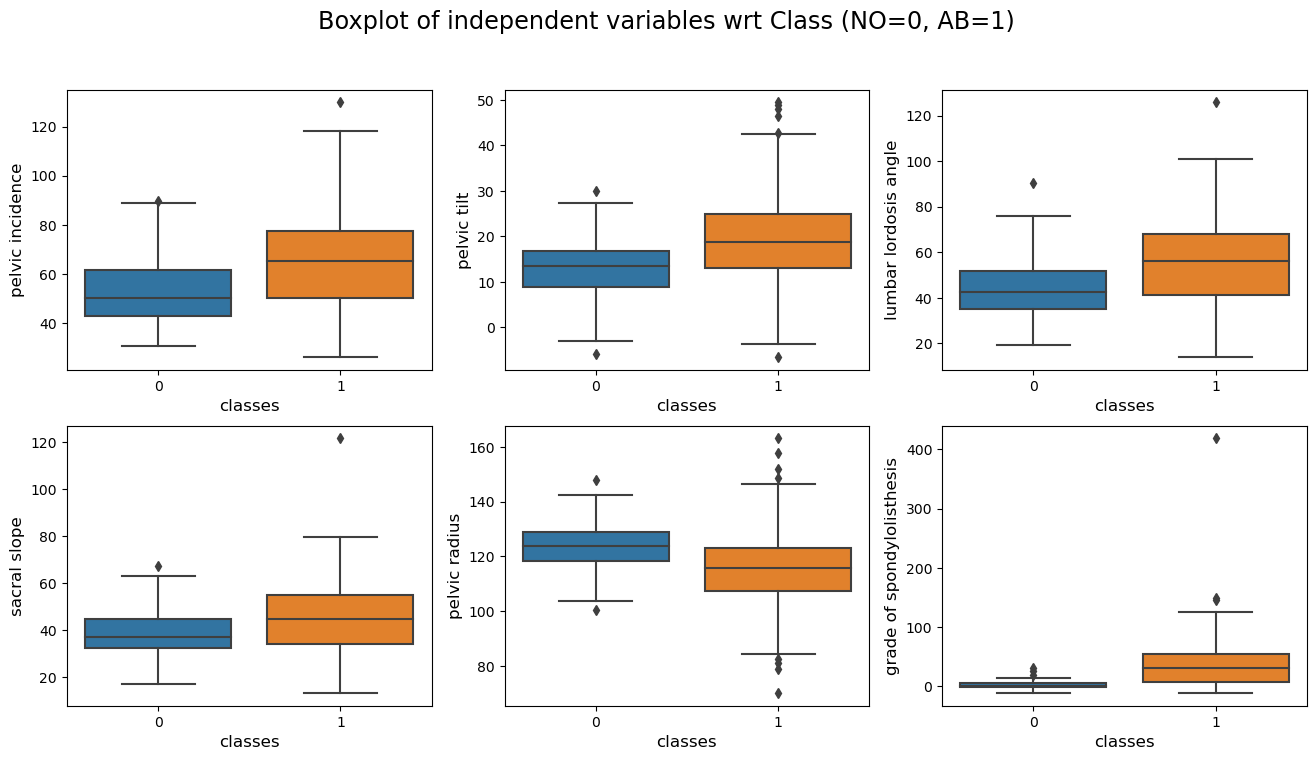

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(16,8))
fig.suptitle('Boxplot of independent variables wrt Class (NO=0, AB=1)', fontsize='xx-large')
count = 0
for col in df.columns:
    if count!=6:
        sns.boxplot(ax=axes[count//3, count%3], data=df, x='classes',y=col)
        axes[count//3, count%3].set_xlabel('classes', fontsize = 12)
        axes[count//3, count%3].set_ylabel(col, fontsize = 12)
        count+= 1
plt.show()

**iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set.**

In [9]:
df_c1 = df.loc[df['classes'] == 1]
c1_train = df_c1.iloc[:140]
c1_test = df_c1.iloc[140:]

df_c0 = df.loc[df['classes'] == 0].reset_index(drop=True)
c0_train = df_c0.iloc[:70]
c0_test = df_c0.iloc[70:]

df_train = pd.concat([c0_train, c1_train], axis=0, ignore_index=True)
df_test = pd.concat([c0_test, c1_test], axis=0, ignore_index=True)

train_x = df_train.drop('classes', axis=1)
train_y = df_train['classes']
test_x = df_test.drop('classes', axis=1)
test_y = df_test['classes']

test_y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: classes, Length: 100, dtype: int32

**(c) Classification using KNN on Vertebral Column Data Set  
i. Write code for k-nearest neighbors with Euclidean metric (or use a software
package).**

Here I will make use of the sklearn K-neighbors classifier package to proceed.  
Link: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [10]:
from sklearn.neighbors import KNeighborsClassifier

**ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k.**  
  
Main resources consulted:
- https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Note: the default arguments for KNeighborsClassifier are p=2, metric='minkowski', which corresponds to the Euclidean metric, which is what we will be using in this section, so no further arguments are passed into the function call for part (c). This feature will be investigated further in part (d).

In [11]:
train_scores = np.empty(208, dtype=float)
test_scores = np.empty(208, dtype=float)

for i in range(208):
    # note the n_neighbors indexing decrements from 208 to 1 (in reverse order)
    model = KNeighborsClassifier(n_neighbors=208-i)
    # Train the model using the training sets
    model.fit(train_x,train_y)

    #Predict Output Scores
    train_scores[i] = model.score(train_x,train_y)
    test_scores[i] = model.score(test_x,test_y)

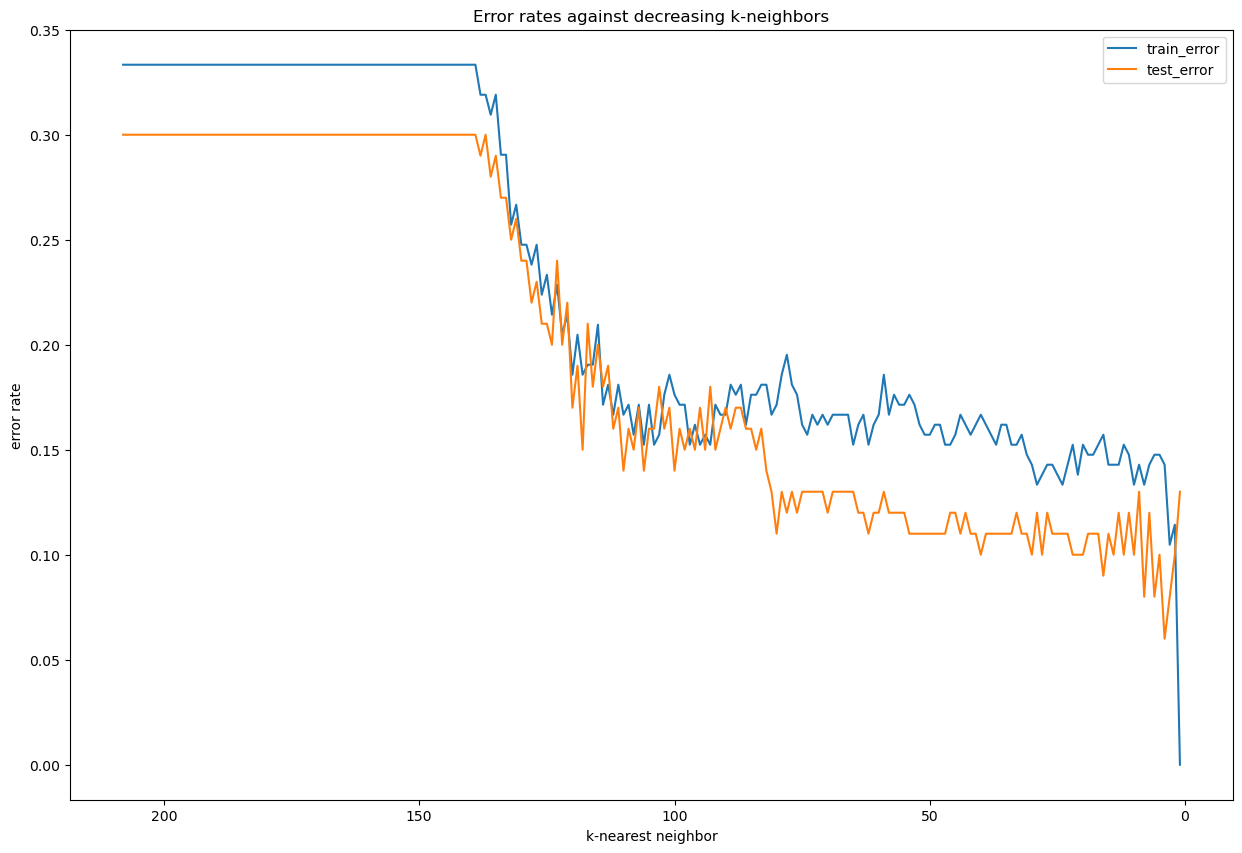

In [12]:
# retrieve training/testing error by taking error = 1 - score
train_error = np.subtract(np.ones(208), train_scores)
test_error = np.subtract(np.ones(208), test_scores)
index = np.arange(208,0,-1)

# create dataframe for plotting results
error_dict = {}
error_dict['k-nearest neighbor'] = index
error_dict['train_error'] = train_error
error_dict['test_error'] = test_error
df_error = pd.DataFrame(data=error_dict).set_index('k-nearest neighbor')

df_error.plot(kind='line', figsize=(15,10), title='Error rates against decreasing k-neighbors').invert_xaxis()
plt.ylabel('error rate')
plt.show()

Notice how the test error rate stays the same from 208 to around 140, before significantly decreasing between k=140 to k=90, and then gradually decreasing to a minimum at k=4, after which it rises again.  
The training error rate however, continues to seemingly decrease till k=1, where it drops to 0. We expect this to happen, because at k=1, the training data which created the model will simply pick its input value as its nearest neighbor, resulting in perfect matching between the labels and thus 0 training error rate when k=1.

**Which k∗ is the most suitable k among those values?**

In [13]:
result = np.where(test_error == np.amin(test_error))
k_star = 208 - result[0][0]
print("The most suitable k is one which minimizes the test error, which in this case is k* =", str(k_star))

The most suitable k is one which minimizes the test error, which in this case is k* = 4


**Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.**  
  
Main resources consulted:
- https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
- https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

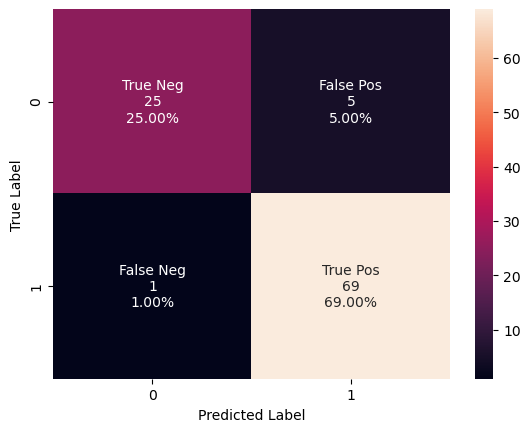

In [15]:
# note the n_neighbors indexing decrements from 208 to 1 (in reverse order)
model = KNeighborsClassifier(n_neighbors=k_star)
# Train the model using the training sets
model.fit(train_x,train_y)
#Predict Output
predicted_y_k_star = model.predict(test_x)

# a more interpretable form of the confusion matrix, code copied and refitted for my purposes from
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
cf_matrix = confusion_matrix(test_y,predicted_y_k_star)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

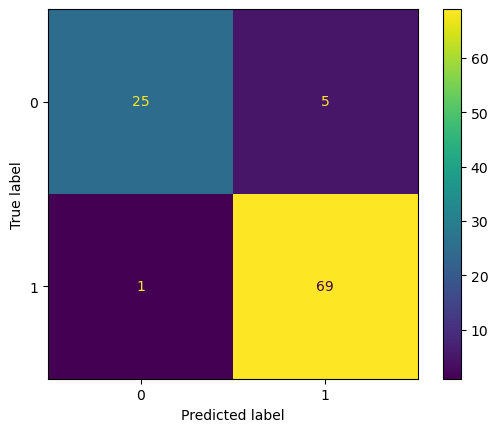

In [16]:
# another version of the same visualized confusion matrix, but without reference to the quoted medium article
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot()
plt.show()

True Positive Rate (TPR), False Negative Rate (FPR), True Negative Rate (TNR), and False Negative Rate (FNR):  

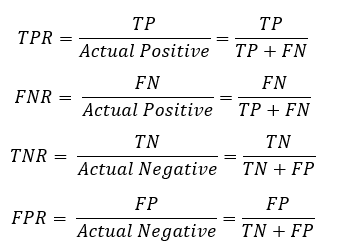
  
Precision:  

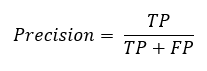
  
F1-Score:  

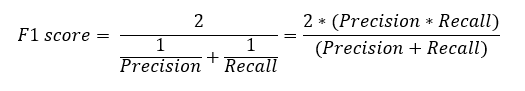
  
Weighted F1-Score, where Beta represents how many times recall is more important than precision:  

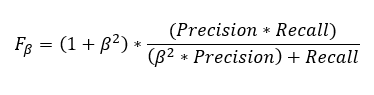

In [17]:
true_negative, false_positive, false_negative, true_positive = cf_matrix.flatten()

# True positive rate is also known as Recall
true_positive_rate = true_positive/(true_positive + false_negative)

true_negative_rate = true_negative/(true_negative + false_positive)

precision = true_positive/(true_positive + false_positive)

f1_score = 2*true_positive_rate*precision/(true_positive_rate+precision)

print('When k* =', k_star)
print('True Positive Rate =', true_positive_rate)
print('True Negative Rate =', true_negative_rate)
print('Precision =', precision)
print('F1 Score =', f1_score)

When k* = 4
True Positive Rate = 0.9857142857142858
True Negative Rate = 0.8333333333333334
Precision = 0.9324324324324325
F1 Score = 0.9583333333333333


**iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210} (For extra practice, you are welcome to choose smaller increments of N).**  
**Note: for each N, select your training set by choosing the first $\lfloor N/3 \rfloor$ rows of Class 0 and the first $N −\lfloor N/3 \rfloor$ rows of Class 1 in the training set you created in 1(b)iii.**  
**Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.**

In [18]:
n_stepsize = 5
n_array = np.arange(10,211,n_stepsize)
# these should have the same size as number of N's we use defined by n_array above
n_best_test_error_rate = np.empty(n_array.size, dtype=float)
n_best_k = np.empty(n_array.size, dtype=float)

# for loop for each N, note I changed the stepsize/increment of N from 10 to 5, for extra practice
for i in range(n_array.size):
    # take first floor(N/3) rows of Class 0 & first N - floor(N/3) rows of class 1
    n_c0_train = df_c0.iloc[:n_array[i]//3]
    n_c1_train = df_c1.iloc[:(n_array[i] - n_array[i]//3)]
    
    n_df_train = pd.concat([n_c0_train, n_c1_train], axis=0, ignore_index=True)
    
    n_train_x = n_df_train.drop('classes', axis=1)
    n_train_y = n_df_train['classes']
    
    k_stepsize = 5
    
    # because our stepsize = 5 and k starts at 1, if k=10 the 11th element won't be included so the second for loop runs 
    # only twice. The test_scores_counter keeps track of the number of times needed to iterate second for loop, so that we 
    # can store the scores from the test for each k upto N in the n_test_scores numpy array  
    test_scores_counter = 0 
    if n_array[i]%k_stepsize == 0:
        test_scores_counter = n_array[i]//k_stepsize
    else:
        test_scores_counter = n_array[i]//k_stepsize + 1
    n_test_scores = np.empty(test_scores_counter, dtype=float)
    
    # for loop for running KNN algorithm for each stepsize of k upto the specific N
    for j in range(1, n_array[i], k_stepsize):
        # note the n_neighbors indexing increments from 1 to n_array[i] in steps of size 5
        model = KNeighborsClassifier(n_neighbors=j)
        # Train the model using the training sets
        model.fit(n_train_x,n_train_y)

        #Predict Output Scores
        n_test_scores[j//k_stepsize] = model.score(test_x,test_y)
    
    # finding the index corresponding to lowest test error
    n_test_error = np.subtract(np.ones(test_scores_counter), n_test_scores)
    n_result = np.where(n_test_error == np.amin(n_test_error))
    
    # saving the data (lowest test error rate, corresponding k) for each N
    n_best_test_error_rate[i] = n_test_error[n_result[0][0]]
    n_best_k[i] = 1 + n_result[0][0]*k_stepsize

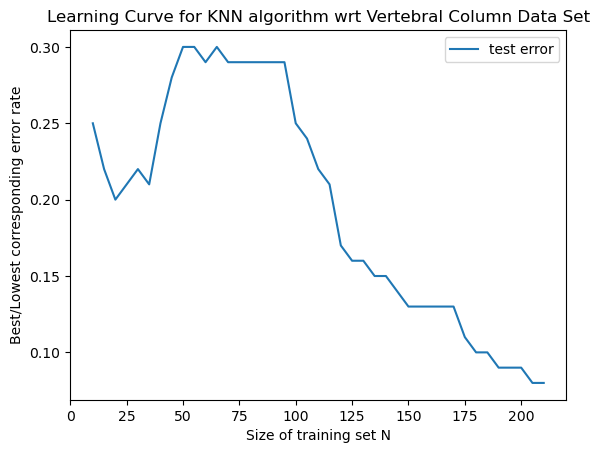

In [19]:
# creating dictionary for creating the learning curve's dataframe from previously calculated data
learning_curve_dict = {}
learning_curve_dict['size_N'] = n_array
learning_curve_dict['best test error rate'] = n_best_test_error_rate
learning_curve_dict['best k'] = n_best_k
df_learning_curve = pd.DataFrame(data=learning_curve_dict)

# plotting learning curve from dataframe
sns.lineplot(data=df_learning_curve, x='size_N', y='best test error rate', label='test error')
plt.xlabel("Size of training set N")
plt.ylabel("Best/Lowest corresponding error rate")
plt.title("Learning Curve for KNN algorithm wrt Vertebral Column Data Set")
plt.show()

**(d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.  
i. Minkowski Distance:**

**A. which becomes Manhattan Distance with p = 1.**

In [20]:
array_len = 196//5+1
manhattan_test_scores = np.empty(array_len, dtype=float)

for i in range(1,197,5):
    # p=1 for manhattan distance
    model = KNeighborsClassifier(n_neighbors=i, p=1)
    # Train the model using the training sets
    model.fit(train_x,train_y)

    #Predict Output Scores
    manhattan_test_scores[i//5] = model.score(test_x,test_y)

# retrieve training/testing error by taking error = 1 - score
manhattan_test_error = np.subtract(np.ones(array_len), manhattan_test_scores)
k_nn = np.arange(1,197,5)

# create dataframe for plotting results
manhattan_error_dict = {}
manhattan_error_dict['k-nearest neighbor'] = k_nn
manhattan_error_dict['test_error'] = manhattan_test_error
manhattan_df_error = pd.DataFrame(data=manhattan_error_dict)
manhattan_df_error_summary = manhattan_df_error.loc[manhattan_df_error['test_error']==min(manhattan_df_error['test_error'])]

print('The lowest errors for unweighted manhattan metric and corresponding k-nearest neighbors are:')
manhattan_df_error_summary

The lowest errors for unweighted manhattan metric and corresponding k-nearest neighbors are:


,k-nearest neighbor,test_error
1,6,0.11
2,11,0.11
5,26,0.11


Thus, we have three k* values with the same test error, k* = 6, 11, 26.

**B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?**


From 1(d)iA, we have 3 choices of k* : k* = 6, 11 and 26. We will explore them each to find the best log10(p) across the three.

In [21]:
k_star_choices = manhattan_df_error_summary['k-nearest neighbor'].tolist()
logp_array = np.linspace(0.1,1,10)
logp_tests_combined = []


for i in range(len(k_star_choices)):
    logp_test_scores = np.empty(logp_array.size, dtype=float)
    
    for j in range(logp_array.size):
        # log(p)=j => p = 10^j
        model = KNeighborsClassifier(n_neighbors=k_star_choices[i], p=10**logp_array[j])
        # Train the model using the training sets
        model.fit(train_x,train_y)

        #Predict Output Scores
        logp_test_scores[j] = model.score(test_x,test_y)
    
    # retrieve training/testing error by taking error = 1 - score
    logp_test_error = np.subtract(np.ones(logp_array.size), logp_test_scores)
    logp_tests_combined.append(logp_test_error)

logp_overall_array = []
for i in range(len(k_star_choices)):
    logp_dict = {}
    logp_dict['log_p'] = logp_array
    logp_dict['test error'] = logp_tests_combined[i]
    logp_dict['k-nearest neighbor'] = k_star_choices[i]
    logp_df = pd.DataFrame(data=logp_dict)
    logp_overall_array.append(logp_df)
    
logp_combined_df = pd.concat(logp_overall_array, axis=0, ignore_index=True)
logp_combined_df_summary = logp_combined_df.loc[logp_combined_df['test error']==min(logp_combined_df['test error'])]

print('The lowest errors for unweighted logp metric with corresponding log(p) value and k-nearest neighbors are:')
logp_combined_df_summary

The lowest errors for unweighted logp metric with corresponding log(p) value and k-nearest neighbors are:


,log_p,test error,k-nearest neighbor
5,0.6,0.06,6


In [22]:
# I wrote this code on my first try, didn't quite like it so I redid it for (d)i,B - 
# I'm just leaving it here for self-reference

# k_star_choices = manhattan_df_error_summary['k-nearest neighbor'].tolist()
# logp_array = np.linspace(0.1,1,10)

# logp_dict = {}
# logp_dict['log_p'] = logp_array
# for i in range(len(k_star_choices)):
#     logp_test_scores = np.empty(logp_array.size, dtype=float)
    
#     for j in range(logp_array.size):
        
#         # log(p)=j => p = 10^j
#         model = KNeighborsClassifier(n_neighbors=k_star_choices[i], p=10**logp_array[j])
#         # Train the model using the training sets
#         model.fit(train_x,train_y)

#         #Predict Output Scores
#         logp_test_scores[j] = model.score(test_x,test_y)
    
#     # retrieve training/testing error by taking error = 1 - score
#     logp_test_error = np.subtract(np.ones(logp_array.size), logp_test_scores)
#     logp_dict['test_error for k*='+str(k_star_choices[i])] = logp_test_error

# logp_df = pd.DataFrame(data=logp_dict).set_index('log_p')
# display(logp_df)
# print("Minimum test errors for each k*:")
# logp_df[['test_error for k*=6','test_error for k*=11','test_error for k*=26']].min()
# logp_df_summary = logp_df.loc[logp_df['test_error for k*=6']==min(logp_df['test_error for k*=6'])].drop(
#     ['test_error for k*=11','test_error for k*=26'],axis=1)
# print("The minimum for log(p) occurs when:")
# display(logp_df_summary)

**C. which becomes Chebyshev Distance with p → ∞**

In [23]:
array_len = 196//5+1
chebyshev_test_scores = np.empty(array_len, dtype=float)

for i in range(1,197,5):
    # p=inf for chebyshev distance
    model = KNeighborsClassifier(n_neighbors=i, p=float('inf'))
    # Train the model using the training sets
    model.fit(train_x,train_y)

    #Predict Output Scores
    chebyshev_test_scores[i//5] = model.score(test_x,test_y)

# retrieve training/testing error by taking error = 1 - score
chebyshev_test_error = np.subtract(np.ones(array_len), chebyshev_test_scores)
k_nn = np.arange(1,197,5)

# create dataframe for plotting results
chebyshev_error_dict = {}
chebyshev_error_dict['k-nearest neighbor'] = k_nn
chebyshev_error_dict['test_error'] = chebyshev_test_error
chebyshev_df_error = pd.DataFrame(data=chebyshev_error_dict)
chebyshev_df_error_summary = chebyshev_df_error.loc[chebyshev_df_error['test_error']==min(chebyshev_df_error['test_error'])]

print('The lowest errors for unweighted chebyshev metric and corresponding k-nearest neighbors are:')
chebyshev_df_error_summary

The lowest errors for unweighted chebyshev metric and corresponding k-nearest neighbors are:


,k-nearest neighbor,test_error
3,16,0.08


**ii. Mahalanobis Distance.**

Main resources consulted:
- https://stackoverflow.com/questions/59862791/knn-mahalanobis-error-size-of-v-does-not-match-python
- https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics
- https://en.wikipedia.org/wiki/Mahalanobis_distance

In [24]:
array_len = 196//5+1
mahalanobis_test_scores = np.empty(array_len, dtype=float)

for i in range(1,197,5):
    # p=inf for chebyshev distance
    model = KNeighborsClassifier(n_neighbors=i, algorithm='brute', metric='mahalanobis', 
                                 metric_params={'VI': np.linalg.pinv(np.cov(train_x))})
    # Train the model using the training sets
    model.fit(train_x,train_y)

    #Predict Output Scores
    mahalanobis_test_scores[i//5] = model.score(test_x,test_y)

# retrieve training/testing error by taking error = 1 - score
mahalanobis_test_error = np.subtract(np.ones(array_len), chebyshev_test_scores)
k_nn = np.arange(1,197,5)

# create dataframe for plotting results
mahalanobis_error_dict = {}
mahalanobis_error_dict['k-nearest neighbor'] = k_nn
mahalanobis_error_dict['test error'] = mahalanobis_test_error
mahalanobis_df_error = pd.DataFrame(data=mahalanobis_error_dict)
mahalanobis_df_error_summary = mahalanobis_df_error.loc[mahalanobis_df_error['test error']==min(mahalanobis_df_error['test error'])]

print('The lowest errors for unweighted mahalanobis metric and corresponding k-nearest neighbors are:')
mahalanobis_df_error_summary

The lowest errors for unweighted mahalanobis metric and corresponding k-nearest neighbors are:


,k-nearest neighbor,test error
3,16,0.08


**(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.**

Here we will utilize the _weights_ metric in the argument for KNeighborsClassifier by setting it to _distance_ instead of the default argument that is _uniform_.

In [25]:
p_euclidean = 2
p_manhattan = 1
p_chebyshev = float('inf')
p_array = [p_euclidean, p_manhattan, p_chebyshev]

array_len = 196//5+1
w_euclidean_test_scores = np.empty(array_len, dtype=float)
w_manhattan_test_scores = np.empty(array_len, dtype=float)
w_chebyshev_test_scores = np.empty(array_len, dtype=float)
weighted_test_scores = [w_euclidean_test_scores, w_manhattan_test_scores, w_chebyshev_test_scores]

for i in range(len(p_array)):
    for j in range(1,197,5):
        # p=p_array[i], weights='distance'
        model = KNeighborsClassifier(n_neighbors=j, p=p_array[i], weights='distance')
        # Train the model using the training sets
        model.fit(train_x,train_y)

        #Predict Output Scores
        weighted_test_scores[i][j//5] = model.score(test_x,test_y)

w_euclidean_test_errors = np.subtract(np.ones(array_len), weighted_test_scores[0])
w_manhattan_test_errors = np.subtract(np.ones(array_len), weighted_test_scores[1])
w_chebyshev_test_errors = np.subtract(np.ones(array_len), weighted_test_scores[2])
k_nn = np.arange(1,197,5)

# creating dataframe for each metric with same indexing
w_euclidean_dict = {}
w_euclidean_dict['k-nn'] = k_nn
w_euclidean_dict['test errors'] = w_euclidean_test_errors
w_euclidean_df = pd.DataFrame(data=w_euclidean_dict)
w_euclidean_df['metric'] = 'euclidean'
w_manhattan_dict = {}
w_manhattan_dict['k-nn'] = k_nn
w_manhattan_dict['test errors'] = w_manhattan_test_errors
w_manhattan_df = pd.DataFrame(data=w_manhattan_dict)
w_manhattan_df['metric'] = 'manhattan'
w_chebyshev_dict = {}
w_chebyshev_dict['k-nn'] = k_nn
w_chebyshev_dict['test errors'] = w_chebyshev_test_errors
w_chebyshev_df = pd.DataFrame(data=w_chebyshev_dict)
w_chebyshev_df['metric'] = 'chebyshev'

# choosing min test error slices of each metric
lowest_error_euclidean = w_euclidean_df.loc[w_euclidean_df['test errors']==min(w_euclidean_df['test errors'])]
lowest_error_manhattan = w_manhattan_df.loc[w_manhattan_df['test errors']==min(w_manhattan_df['test errors'])]
lowest_error_chebyshev = w_chebyshev_df.loc[w_chebyshev_df['test errors']==min(w_chebyshev_df['test errors'])]

# concatenating each min-df and then sorting to give final sorted values across the board
lowest_errors_combined = pd.concat([lowest_error_euclidean,lowest_error_manhattan,lowest_error_chebyshev],
                                  axis=0, ignore_index=True)
w_summary_df = lowest_errors_combined.sort_values(by=['test errors'])

print('The lowest errors across each group of metrics for weighted distances and their corresponding k-nearest neighbors are:')
w_summary_df

The lowest errors across each group of metrics for weighted distances and their corresponding k-nearest neighbors are:


,k-nn,test errors,metric
0,6,0.10,euclidean
1,26,0.10,manhattan
2,16,0.11,chebyshev
3,31,0.11,chebyshev
4,36,0.11,chebyshev
5,41,0.11,chebyshev
6,61,0.11,chebyshev


**(f) What is the lowest training error rate you achieved in this homework?**

The lowest training error rate is when k=1 for the KNN algorithm. In such a situation, the training data would simply choose itself as its nearest point, resulting in the same correct label being chosen in every circumstance when asked to predict for the training data. This would lead to only true positives and true negatives always, and thus a lowest training error rate of 0 when k=1.
  
This is evidenced in the error rates against decreasing k-neighbors in c(ii).